## I: Data Preprocessing


In [1]:
import numpy as np
import pandas as pd 
import re

In [4]:
import os 
os.getcwd()

'/Users/lurui'

In [5]:
os.chdir('/Users/lurui/Desktop')

In [7]:
data=pd.read_csv("/Users/lurui/Desktop/Insight/review_dataset.trim.csv")

In [8]:
data_new=data.dropna()

In [9]:
### Drop missing value
data_new.isnull().sum()

Unnamed: 0           0
Name                 0
Speciality           0
Star Rating          0
Staff                0
Punctuality          0
Helpfulness          0
Knowledge            0
comment              0
Rating Usefulness    0
Review Date          0
Link                 0
text_length          0
trim_comment         0
dtype: int64

In [8]:
### Drop duplicated values
data_new=data.drop_duplicates()

In [9]:
data_new.shape

(12529, 14)

In [10]:
### The number of doctors 
len(data_new['Name'].unique())

530

In [11]:
### Number of review per doctor
data_new.groupby(["Name"]).size().describe()

count    530.000000
mean      23.639623
std       52.578507
min        1.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      702.000000
dtype: float64

In [12]:
## Drop out the useless information 
data_new=data_new.drop(["Unnamed: 0","Link"],axis=1)

#### a. Rating usefulness

In [15]:
data_new['Rating Usefulness']=data_new['Rating Usefulness'].apply(lambda x: x.replace('[','').replace(']','').replace("'","")) 

In [16]:
data_new['Rating Usefulness'] = data_new['Rating Usefulness'].astype(int)

In [17]:
data_new['Rating Usefulness'].describe()

count    12529.000000
mean         0.438183
std          1.376121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         47.000000
Name: Rating Usefulness, dtype: float64

#### b. Date of review 

In [22]:
data_new['Review Date']=data_new['Review Date'].apply(lambda x: x.replace("'","").replace(",","")) 

In [23]:
data_new['Review Date']=data_new['Review Date'].apply(lambda x: x.replace('[','').replace(']','').replace("'","")) 

In [24]:
data_new['Review Date'] =pd.to_datetime(data_new['Review Date'] )

In [26]:
data_new['Review Date']

0       2019-11-20
1       2019-07-07
2       2019-01-02
3       2017-08-09
4       2015-11-08
           ...    
12524   2017-06-13
12525   2017-06-01
12526   2017-05-23
12527   2017-04-25
12528   2017-03-18
Name: Review Date, Length: 12529, dtype: datetime64[ns]

#### c. Add Date and Year

In [27]:
data_new["Review Date"]=pd.to_datetime(data_new["Review Date"])
data_new["Order_Mt"]= data_new["Review Date"].dt.month
data_new["Order_Yr"]= data_new["Review Date"].dt.year

In [28]:
data_new.columns

Index(['Name', 'Speciality', 'Star Rating', 'Staff', 'Punctuality',
       'Helpfulness', 'Knowledge', 'comment', 'Rating Usefulness',
       'Review Date', 'text_length', 'trim_comment', 'Order_Mt', 'Order_Yr'],
      dtype='object')

In [29]:
data_new.shape

(12529, 14)

In [30]:
data_new['Speciality'].value_counts()

Plastic / Cosmetic Surgeon, Physician          3594
Gynecologist (OBGYN)                           2468
Orthopedic Surgeon                             2180
Dentist                                        2030
Internist / Geriatrician                       1160
Family Doctor / G.P.                            901
Limb Lengthening and Complex Reconstruction     114
Gynecomastia Specialist                          82
Name: Speciality, dtype: int64

## II:  Explorytary data analysis 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.set()
sns.set_context("paper")

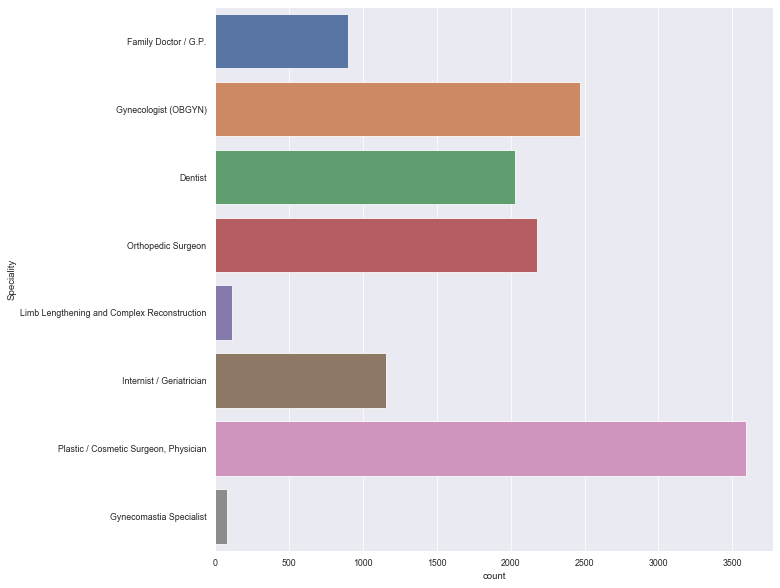

In [33]:
### Distribution of the speciality of the sample 
plt.figure(figsize=(10,10))
ax = sns.countplot(y="Speciality",data=data_new,label='big')

In [34]:
## Number of reviews per doctor 
data_new.groupby(["Name"]).size().reset_index(name='counts')

,Name,counts
0,Dr. Aaron N. Manson,6
1,Dr. Adam D. Schaffner,18
2,Dr. Adam D. Zeitlin,3
3,Dr. Adina Benitez,4
4,Dr. Adrienne L. Simone,14
...,...,...
525,Dr. Yael Freeman,3
526,Dr. Yiling Shiao,4
527,Dr. Zachary Bregman,25
528,Dr. Zhanna Tsukerman,5


In [35]:
data_new.groupby(["Name"]).size().describe()

count    530.000000
mean      23.639623
std       52.578507
min        1.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      702.000000
dtype: float64

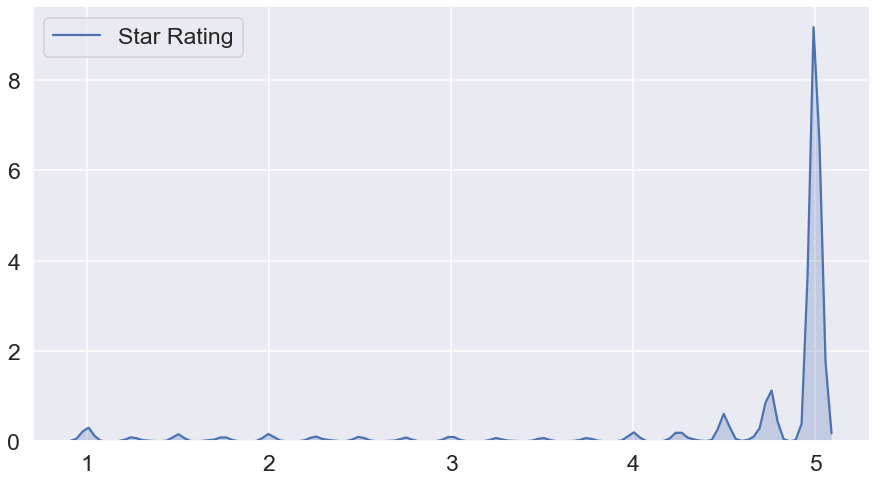

In [36]:
### The over all rating score 
sns.set()
sns.set_context("talk",font_scale=1.4)
plt.figure(figsize=(15,8))
#ax = sns.countplot(x="Star Rating",data=data,label='big')
sns.kdeplot(data_new["Star Rating"],shade=True,cut=3,clip=(0,6))

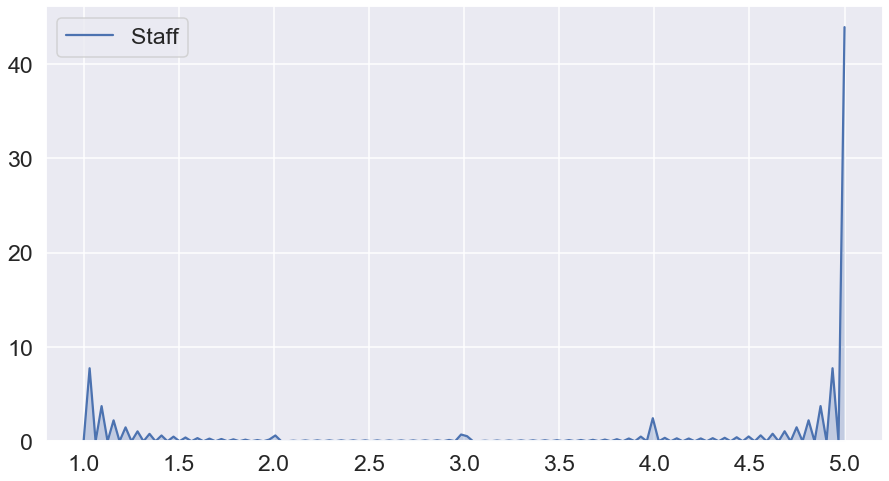

In [37]:
### The staff score
sns.set()
sns.set_context("talk",font_scale=1.4)
plt.figure(figsize=(15,8))
sns.kdeplot(data_new["Staff"], shade=True,cut=3,clip=(0,6))

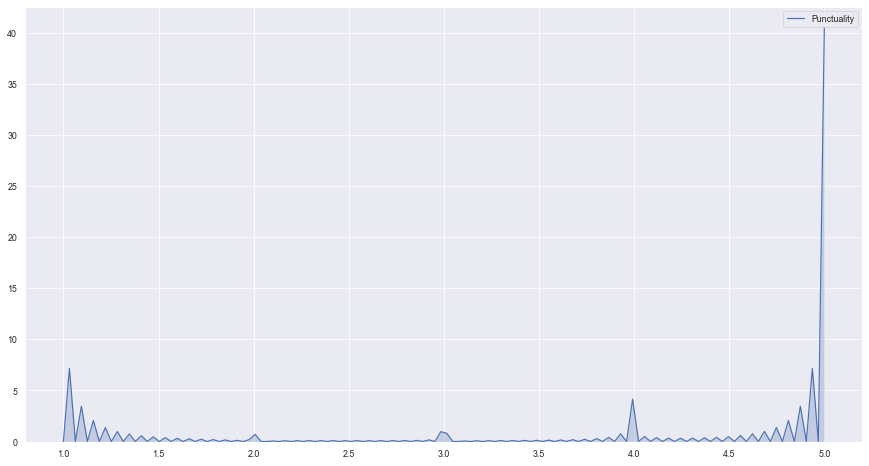

In [38]:
### The punctuality score
sns.set()
sns.set_context("paper")
plt.figure(figsize=(15,8))
sns.kdeplot(data_new["Punctuality"], shade=True,cut=3,clip=(0,6))

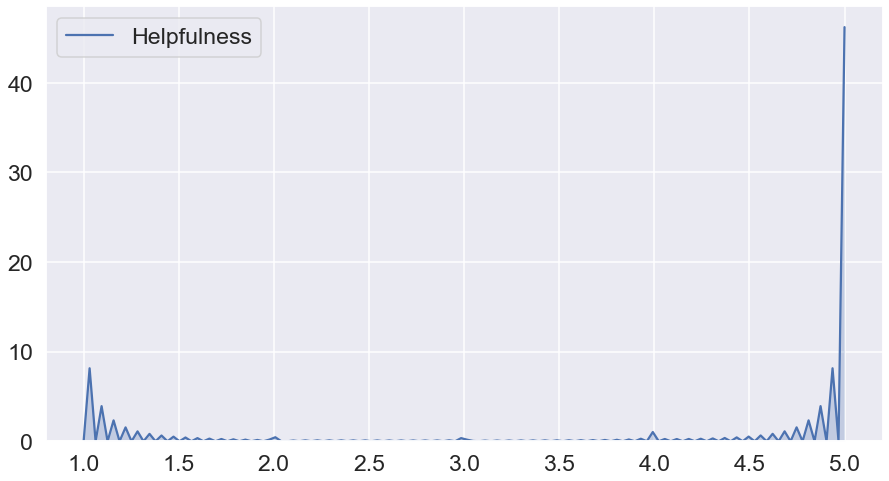

In [39]:
### The helpfulness score
sns.set()
sns.set_context("talk",font_scale=1.4)
plt.figure(figsize=(15,8))
sns.kdeplot(data_new["Helpfulness"],shade=True,cut=3,clip=(0,6))

<Figure size 1080x576 with 0 Axes>

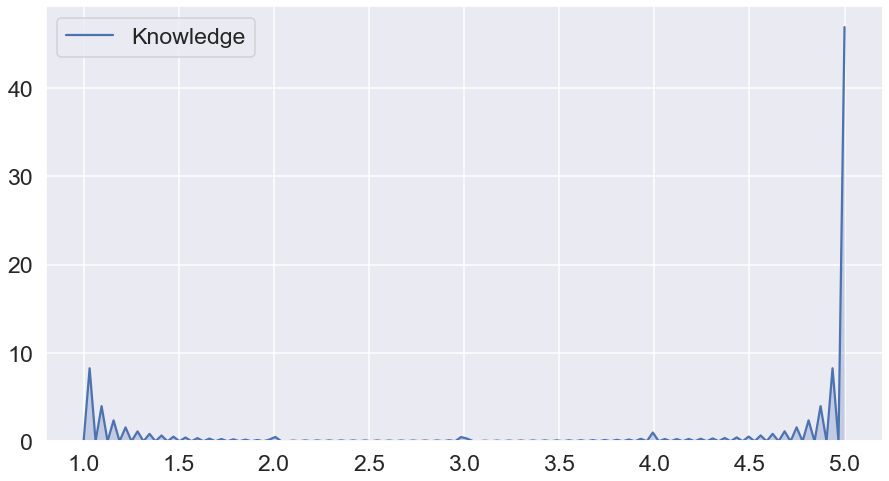

In [40]:
### The Knowledge score
sns.set()
sns.set_context("talk",font_scale=1.4)
plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
sns.kdeplot(data_new["Knowledge"],shade=True,cut=3,clip=(0,6))

In [41]:
### Distribution of overall ratings 
mean_Star_Rating_score_by_dr=data_new.groupby(['Name'])['Star Rating'].mean()

In [42]:
mean_Star_Rating_score_by_dr.describe()

count    530.000000
mean       4.423186
std        0.529623
min        2.312500
25%        4.052867
50%        4.531080
75%        4.896261
max        5.000000
Name: Star Rating, dtype: float64

In [43]:
### Length of each sentence 
def getSentenceLength (vec):
### Get the sentence length for each reviews
    return (len(vec))

In [44]:
data_new["text_length"] = data_new["comment"].apply(lambda x: getSentenceLength(x))

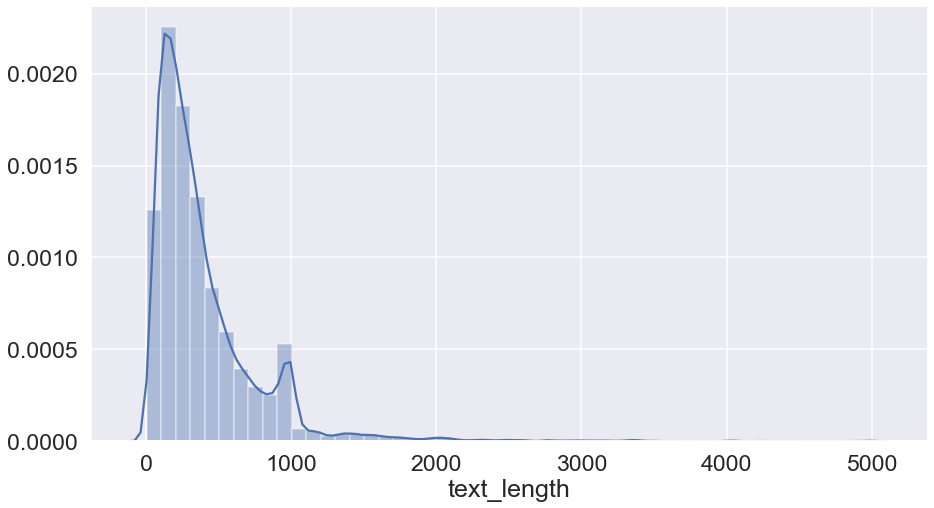

In [45]:
### The length of the review
sns.set()
sns.set_context("talk",font_scale=1.4)
plt.figure(figsize=(15,8))
sns.distplot(data_new['text_length'])

## III: Text Feature Engineering

I will perform the following steps:

* **Name** **entity** **remove**: Remove the person and entities name
* **Tokenization**: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All **stopwords** are removed.
* Words are **lemmatized** - words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are **stemmed** - words are reduced to their root form.

In [ ]:
### Name entity remove
import spacy

In [ ]:
def detect_name_ent (phrase):
    nlp=spacy.load('en_core_web_sm')
    doc=nlp(phrase)
    ne=[ent.text for ent in doc.ents]
    for i in ne:
        phrase=phrase.replace(i,"")
    phrase_clean=phrase.replace("Dr.","")
    return(phrase_clean)

In [ ]:
detect_name_ent(data_new['comment'][48])

In [ ]:
len(data_new['comment'])

In [ ]:
trim_comment=[]
for i in list(range(0,12529)):
     trim_comment.append(detect_name_ent(data_new['comment'][i]))

In [ ]:
data_new['trim_comment']=pd.DataFrame(trim_comment)

In [ ]:
data_new.head(50)

In [46]:
data_new.to_csv(r'review_dataset.clean.csv', encoding='utf8')

In [11]:
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint

[nltk_data] Downloading package stopwords to /Users/lurui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [17]:
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [19]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [68]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use',
                   'not', 'would', 'say', 'could', '_', 'be', 
                   'know', 'good', 'go', 'get', 'do', 'done', 
                   'try', 'many', 'some', 'nice', 'thank', 'think', 
                   'see', 'rather', 'easy', 'easily', 'lot', 'lack', 
                   'make', 'want', 'seem', 'run', 'need', 'even', 'right', 
                   'line', 'even', 'also', 'may', 'take', 'come','find','great','visit',
                    'give','happy','life','pain','make','good','find'])

In [69]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [70]:
#### Tokenizing words and removing punctuations and unnecessary characters altogether
data_words = list(sent_to_words(data_new['trim_comment']))

In [71]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words])  

In [72]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [73]:
print(trigram_mod[bigram_mod[data_words[0]]])

['thought', 'was', 'extremely', 'caring', 'and', 'attentive', 'to', 'my', 'needs', 'he', 'was', 'very', 'thorough', 'in', 'his', 'exam', 'and', 'was', 'very', 'confident', 'in', 'his', 'ability', 'to', 'address', 'my', 'issues', 'would_recommend_him', 'very', 'highly']


In [65]:
### Remove Stopwords, Make Bigrams and Lemmatize

In [74]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [75]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [77]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [78]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [80]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [81]:
#Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [53]:
print(data_lemmatized[:1])

[['think', 'extremely', 'care', 'attentive', 'need', 'thorough', 'exam', 'confident', 'ability', 'address', 'issue', 'would', 'recommend', 'highly']]


### IV:  Topic Modeling

In [82]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [83]:
# Create Corpus
texts = data_lemmatized

In [84]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [85]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [86]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 1),
  ('address', 1),
  ('attentive', 1),
  ('care', 1),
  ('confident', 1),
  ('exam', 1),
  ('extremely', 1),
  ('highly', 1),
  ('issue', 1),
  ('need', 1),
  ('recommend', 1),
  ('think', 1),
  ('thorough', 1)]]

In [87]:
### LDA Model 
mallet_path = "/Users/lurui/Desktop//mallet-2.0.8/bin/mallet"

In [88]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

In [89]:
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('doctor', 0.03547315925549252),
   ('time', 0.01934788202570732),
   ('call', 0.015782186224896154),
   ('appointment', 0.01385842594748257),
   ('find', 0.01179987991814829),
   ('wait', 0.01106468490767176),
   ('give', 0.010929899155751063),
   ('back', 0.01064807440173506),
   ('problem', 0.00930021688252809),
   ('hand', 0.009287963632353482)]),
 (1,
  [('surgery', 0.05656943405634505),
   ('result', 0.03324607329842932),
   ('make', 0.027773622538020445),
   ('feel', 0.027636499626028422),
   ('work', 0.023597606581899775),
   ('procedure', 0.020144602343555224),
   ('surgeon', 0.016965843929194716),
   ('amazing', 0.016454749439042633),
   ('perform', 0.010408875592121666),
   ('friend', 0.00868860633258539)]),
 (2,
  [('staff', 0.053323399499760525),
   ('care', 0.041070193177585014),
   ('doctor', 0.04029854717683998),
   ('patient', 0.04019211324570273),
   ('office', 0.027632909371507638),
   ('time', 0.025876749507743067),
   ('good', 0.02494545261029216),
   ('rec

In [90]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [91]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

In [92]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

In [93]:
topics = ldamallet.show_topics(formatted=False)

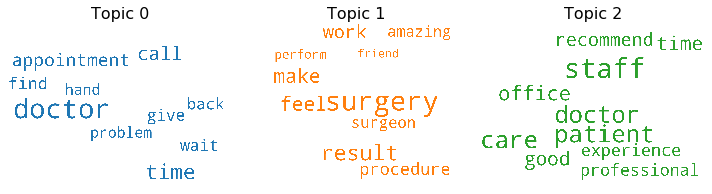

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Choose the right number of topics

In [95]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
Topic_coherence_score=[]
for i in list(range(1,15)):
    m = gensim.models.LdaMulticore(corpus, num_topics=i, id2word =id2word, passes = 2, workers=4)
    cm = CoherenceModel(model=m, corpus=common_corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    Topic_coherence_score.append(coherence )

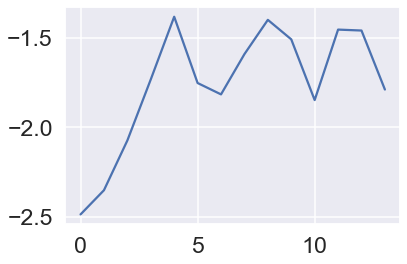

In [319]:
plt.plot(Topic_coherence_score)

In [101]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [89]:
import pyLDAvis

In [431]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

/Applications/anaconda/envs/mypython3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Applications/anaconda/envs/mypython3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Applications/anaconda/envs/mypython3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=             x         y  topics  cluster       Freq
topic                                               
0     -0.34551  0.128544       1        1  35.270709
1      0.05631 -0.350329       2        1  33.628288
2      0.28920  0.221785       3        1  31.101003, topic_info=    Category         Freq     Term        Total  loglift  logprob
908  Default  5797.000000  surgery  5797.000000  30.0000  30.0000
168  Default  4978.000000    staff  4978.000000  29.0000  29.0000
3    Default  3759.000000     care  3759.000000  28.0000  28.0000
114  Default  3724.000000    great  3724.000000  27.0000  27.0000
46   Default  3883.000000     good  3883.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
31    Topic3  2937.359044   doctor  7475.519911   0.2338  -3.5128
85    Topic3  1132.416197  amazing  1811.414171   0.6982  -4.4659
42    Topic3  1419.229033     time  4433.599888   0.0288  -4.2402
16    Topic3   944.504339     feel  2814.615082   0.0760  -4.6474
34    Topic3   691.070583   friend  1227.389809   0.5935  -4.9598

[237 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1         3  0.998288           address
5001      3  1.078520  already_referred
3796      1  0.995870            amazed
85        1  0.374845           amazing
85        3  0.624926           amazing
...     ...       ...               ...
248       2  0.999962              wait
664       1  1.000023              walk
469       3  1.000256         wonderful
77        1  0.673975              work
77        2  0.326037              work

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [102]:
### Assign to the topic based on the similarity 
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [103]:
data_new.columns

Index(['Unnamed: 0', 'Name', 'Speciality', 'Star Rating', 'Staff',
       'Punctuality', 'Helpfulness', 'Knowledge', 'comment',
       'Rating Usefulness', 'Review Date', 'Link', 'text_length',
       'trim_comment'],
      dtype='object')

In [104]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus,texts=texts)

In [105]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [106]:
# Show the dominant topics 
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.3777,"staff, care, doctor, patient, office, time, go...","[think, extremely, care, attentive, need, thor..."
1,1,2.0,0.3602,"staff, care, doctor, patient, office, time, go...","[friendly, punctual, super, email, lab, result..."
2,2,2.0,0.3879,"staff, care, doctor, patient, office, time, go...","[experience, doctor, past_experiences, see, ti..."
3,3,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
4,4,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
5,5,2.0,0.3911,"staff, care, doctor, patient, office, time, go...","[excellent, physician, exceptional, bedside_ma..."
6,6,2.0,0.3678,"staff, care, doctor, patient, office, time, go...","[see, schleider, extremely, thorough, attentiv..."
7,7,2.0,0.3980,"staff, care, doctor, patient, office, time, go...","[fantastic, service, friendly, knowledgeable, ..."
8,8,2.0,0.3659,"staff, care, doctor, patient, office, time, go...","[work, care, patient, require, hour, care, com..."
9,9,2.0,0.3869,"staff, care, doctor, patient, office, time, go...","[place, neat, really, enjoy, experience, stuff..."


In [153]:
df_dominant_topic['Keywords'][0]

'staff, care, doctor, patient, office, time, good, recommend, experience, professional'

In [176]:
df_dominant_topic.shape

(12529, 5)

In [154]:
### Order is follow the original order
df_dominant_topic.to_csv(r'topic.data.csv', encoding='utf8')

In [149]:
os.chdir('/Users/lurui/Desktop/Insight')

In [113]:
#### save the model parameters
ldamallet.save('lda_model')

###  V:  Sentiment Analysis

In [116]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [117]:
analyser = SentimentIntensityAnalyzer()

In [118]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    return (score)

In [119]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [120]:
### Create sentiment score
empty=[]
for i in list(range(0,12529)):
    test=listToString(data_lemmatized[i])
    empty.append(sentiment_analyzer_scores(test))

In [121]:
### Sentiment Score
data_sentiment_score=pd.DataFrame.from_dict(empty)

In [175]:
data_sentiment_score

,neg,neu,pos,compound
0,0.000,0.439,0.561,0.8883
1,0.000,0.524,0.476,0.8748
2,0.000,0.447,0.553,0.9118
3,0.000,0.385,0.615,0.7506
4,0.000,0.385,0.615,0.7506
...,...,...,...,...
12524,0.000,0.226,0.774,0.8834
12525,0.026,0.552,0.422,0.9852
12526,0.000,0.490,0.510,0.8860
12527,0.000,0.580,0.420,0.9062


The polarity score is a float within the range [-1.0, 1.0].
The subjectivity is a float within the range [0.0, 1.0] 
0.0 is very objective and 
1.0 is very subjective.

In [124]:
from textblob import TextBlob

In [125]:
### Decompose the sentiment score into subjective vs.polarity 
empty_1=[]
for i in list(range(0,12529)):
    test=listToString(data_lemmatized[i])
    empty_1.append(list(TextBlob(test).sentiment))

In [126]:
data_pos_sub=pd.DataFrame(empty_1,columns=['polarity','subjectivity'])

In [157]:
data_pos_sub.head(10)

,polarity,subjectivity
0,0.233750,0.818333
1,0.227083,0.377381
2,0.000000,0.000000
3,0.375000,0.500000
4,0.375000,0.500000
5,0.833333,1.000000
6,0.193750,0.675000
7,0.258333,0.633333
8,-0.300000,0.400000
9,0.191667,0.600000


In [169]:
data_pos_sub.shape

(12529, 2)

In [163]:
data=data.drop(['Unnamed: 0'],axis=1)

In [164]:
data.shape

(12529, 13)

In [128]:
data.reset_index(drop=True, inplace=True)
data_pos_sub.reset_index(drop=True, inplace=True)
data_sentiment_score.reset_index(drop=True, inplace=True)

In [177]:
data_full=pd.concat([data,data_sentiment_score,data_pos_sub,df_dominant_topic],axis=1)

In [178]:
data_full.head(10)

,Name,Speciality,Star Rating,Staff,Punctuality,Helpfulness,Knowledge,comment,Rating Usefulness,Review Date,...,neu,pos,compound,polarity,subjectivity,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I thought was extremely caring and attentive...,['0'],"['November', '20,', '2019']",...,0.439,0.561,0.8883,0.233750,0.818333,0,2.0,0.3777,"staff, care, doctor, patient, office, time, go...","[think, extremely, care, attentive, need, thor..."
1,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"was friendly, punctual, and super nice. He e...",['0'],"['July', '7,', '2019']",...,0.524,0.476,0.8748,0.227083,0.377381,1,2.0,0.3602,"staff, care, doctor, patient, office, time, go...","[friendly, punctual, super, email, lab, result..."
2,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,My experience with was the opposite of every...,['0'],"['January', '2,', '2019']",...,0.447,0.553,0.9118,0.000000,0.000000,2,2.0,0.3879,"staff, care, doctor, patient, office, time, go...","[experience, doctor, past_experiences, see, ti..."
3,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,very good. Very knowledgeable and friendly wit...,['0'],"['August', '9,', '2017']",...,0.385,0.615,0.7506,0.375000,0.500000,3,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
4,Dr. Natan Schleider,Family Doctor / G.P.,4.0,5,5.0,5,1.0,is very knowledgeable and friendly with an e...,['0'],"['November', '8,', '2015']",...,0.385,0.615,0.7506,0.375000,0.500000,4,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
5,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,Excellent Physician with exceptional bedside m...,['2'],"['August', '13,', '2015']",...,0.580,0.420,0.7003,0.833333,1.000000,5,2.0,0.3911,"staff, care, doctor, patient, office, time, go...","[excellent, physician, exceptional, bedside_ma..."
6,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I've been seeing Dr Schleider for . He is extr...,['5'],"['November', '3,', '2014']",...,0.785,0.215,0.5520,0.193750,0.675000,6,2.0,0.3678,"staff, care, doctor, patient, office, time, go...","[see, schleider, extremely, thorough, attentiv..."
7,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"Fantastic service, Friendly & Knowledgeable! I...",['1'],"['September', '2,', '2013']",...,0.165,0.835,0.9349,0.258333,0.633333,7,2.0,0.3980,"staff, care, doctor, patient, office, time, go...","[fantastic, service, friendly, knowledgeable, ..."
8,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I am a registered nurse in and worked with ...,['3'],"['July', '10,', '2013']",...,0.520,0.338,0.7178,-0.300000,0.400000,8,2.0,0.3659,"staff, care, doctor, patient, office, time, go...","[work, care, patient, require, hour, care, com..."
9,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"is nice, professional and knowledgable. The ...",['2'],"['April', '7,', '2013']",...,0.361,0.500,0.7900,0.191667,0.600000,9,2.0,0.3869,"staff, care, doctor, patient, office, time, go...","[place, neat, really, enjoy, experience, stuff..."


In [179]:
### Positive Sentiment
data_full["Positive Sentiment"]=(data_full["compound"] >= 0.05)

In [180]:
data_full["Negative Sentiment"]=(data_full["compound"] <= -0.05)

In [181]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.3777,"staff, care, doctor, patient, office, time, go...","[think, extremely, care, attentive, need, thor..."
1,1,2.0,0.3602,"staff, care, doctor, patient, office, time, go...","[friendly, punctual, super, email, lab, result..."
2,2,2.0,0.3879,"staff, care, doctor, patient, office, time, go...","[experience, doctor, past_experiences, see, ti..."
3,3,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
4,4,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","[knowledgeable, friendly, manner, highly_recom..."
...,...,...,...,...,...
12524,12524,2.0,0.3683,"staff, care, doctor, patient, office, time, go...","[excellent, kind, caring, job, breast, ask]"
12525,12525,1.0,0.4245,"surgery, result, make, feel, work, procedure, ...","[doctor, staff, absolutely, amazing, surgery, ..."
12526,12526,1.0,0.3837,"surgery, result, make, feel, work, procedure, ...","[far, good, surgeon, amazing_job, change, much..."
12527,12527,0.0,0.3479,"doctor, time, call, appointment, find, wait, g...","[know, work, time, time, correct, abdominal, p..."


In [182]:
data_full.columns

Index(['Name', 'Speciality', 'Star Rating', 'Staff', 'Punctuality',
       'Helpfulness', 'Knowledge', 'comment', 'Rating Usefulness',
       'Review Date', 'Link', 'text_length', 'trim_comment', 'neg', 'neu',
       'pos', 'compound', 'polarity', 'subjectivity', 'Document_No',
       'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text',
       'Positive Sentiment', 'Negative Sentiment'],
      dtype='object')

In [136]:
data_full.groupby(['Name','Dominant_Topic'])

In [186]:
data_full.to_csv(r'overall.data.csv', encoding='utf8')

In [328]:
from collections import Counter
from operator import itemgetter

###  VI: Create evaluation criterias for text review 

#### 1: The readability :
The Dale–Chall readability formula is a readability test that provides a numeric gauge of the comprehension difficulty that readers come upon when reading a text. It uses a list of 3000 words that groups of fourth-grade American students could reliably understand, considering any word not on that list to be difficult.

In [409]:
import textstat

In [410]:
def get_readability(text_data):
    ### text_data is each reviews for doctors
    readabli_index= textstat.dale_chall_readability_score(text_data)
    return(readabli_index)

In [411]:
### Get the redability score
readability_text=[]
for i in list(range(0,12529)):
    readability_text.append(get_readability(data_full["comment"][i]))

In [192]:
readabili_text.shape

(12529, 1)

In [198]:
data_full["readability"]=readabili_text

#### 2: The lexical richness
lexical diversity includes variability, volume, evenness, rarity, dispersion and disparity. I am using Measure of Lexical Diversity by McCarthy 2005, McCarthy and Jarvis 2010.

In [412]:
from lexicalrichness import LexicalRichness

In [193]:
def get_textrich (text):
    lex = LexicalRichness(text)
    return(lex.mtld(threshold=0.72))

In [194]:
richness_text=[]
for i in list(range(0,12529)):
    richness_text.append(get_textrich(data_full["comment"][i]))

In [195]:
richness_text=pd.DataFrame(richness_text)

In [199]:
data_full["richness_text"]=richness_text

#### 3: Percentage that contribute to the topic 
probability of belonging to a specific topic for all topics

In [197]:
Topic_Perc_Contrib=df_dominant_topic['Topic_Perc_Contrib']

In [200]:
score_data=data_full[['Topic_Perc_Contrib','readability','richness','subjectivity']]

#### 4: Objectivity of the review
motional evaluation: Such evaluations are from non-tangible and emotional responses to entities which go deep into people’s state of mind.Subjective sentence expresses some personal feelings, views, or beliefs..

In [203]:
score_data["objectivity"]=1-score_data['subjectivity']

/Applications/anaconda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [394]:
score_data=score_data.drop(["subjectivity"],axis=1)

In [205]:
score_data=score_data.drop(['subjectivity'],axis=1)

In [206]:
score_data.head(10)

,Topic_Perc_Contrib,readability,richness,objectivity
0,0.3777,8.73,35.000000,0.181667
1,0.3602,8.71,78.493333,0.622619
2,0.3879,8.84,84.000000,1.000000
3,0.3933,8.67,39.631589,0.500000
4,0.3933,8.87,112.000000,0.500000
5,0.3911,8.53,102.060000,0.000000
6,0.3678,7.40,80.920000,0.325000
7,0.3980,8.22,15.000000,0.366667
8,0.3659,10.17,68.040000,0.600000
9,0.3869,6.01,71.680000,0.400000


In [291]:
score_data['Review Useful']=data_full['Review Useful']

In [293]:
score_data['Review Useful']

0    9670
1    2859
Name: Review Useful, dtype: int64

In [294]:
score_data["text"]=data_lemmatized

In [295]:
score_data.to_csv(r'evaluation.data.csv', encoding='utf8')